In [1]:
import pandas as pd
import numpy as np
import os
import yaml

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Parameters

In [2]:
# this cell is tagged `parameters` and will be overridden by papermill
sample_name = "2091_CS1429a_T_1_CD45pos_citeseq_2_CITE"
workflow_id = "eb5f81d3-cb16-4436-80f0-c8c0a2ed04d6"
path_data = os.path.join("./citeseq/", sample_name, workflow_id)

## Run Report

In [3]:
!cat $path_data/report/run_report.yaml

Date: 2020-10-16
Running time: 16.0 minutes, 3.71 seconds
CITE-seq-Count Version: 1.4.3
Reads processed: 36668612
Percentage mapped: 95
Percentage unmapped: 5
Uncorrected cells: 0
Correction:
	Cell barcodes collapsing threshold: 1
	Cell barcodes corrected: 35601
	UMI collapsing threshold: 1
	UMIs corrected: 36175
Run parameters:
	Read1_filename: /cromwell_root/dp-lab-batch/cromwell-execution/CiteSeq/eb5f81d3-cb16-4436-80f0-c8c0a2ed04d6/call-Preprocess/Preprocess/e96102a6-b8fc-4b51-990a-14ec9f61e854/call-TrimR1/R1.fastq.gz
	Read2_filename: /cromwell_root/dp-lab-batch/cromwell-execution/CiteSeq/eb5f81d3-cb16-4436-80f0-c8c0a2ed04d6/call-Preprocess/Preprocess/e96102a6-b8fc-4b51-990a-14ec9f61e854/call-TrimR2/R2.fastq.gz
	Cell barcode:
		First position: 1
		Last position: 16
	UMI barcode:
		First position: 17
		Last position: 28
	Expected cells: 0
	Tags max errors: 2
	Start trim: 0


In [4]:
with open(os.path.join(path_data, "report/run_report.yaml"), "rt") as fin:
    # report file contains tabs
    # run_report = yaml.load(fin, Loader=yaml.FullLoader)        
    run_report = fin.read().replace("\t", "  ")
    run_report = yaml.load(run_report, Loader=yaml.FullLoader)

## Reads Count

In [5]:
import numpy as np
import scipy.io

In [6]:
mtx = scipy.io.mmread(
    os.path.join(path_data, "reads/matrix.mtx.gz")
)

In [7]:
barcodes = pd.read_csv(
    os.path.join(path_data, "reads/barcodes.tsv.gz"),
    sep="\t", 
    compression="gzip",
    header=None
)

In [8]:
features = pd.read_csv(
    os.path.join(path_data, "reads/features.tsv.gz"),
    sep="\t",
    compression="gzip",
    header=None
)

In [9]:
df_reads = pd.DataFrame(
    mtx.T.todense(),
    index=barcodes[0],
    columns=features[0]
)

In [10]:
df_reads

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT,unmapped
0,,,,,,,,,,,,,,,,,,,,,
TAGACCATCAAACGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,18,1
ACAGCCGTCCATCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,29,40,0,25
GTGGGAAAGAGAGTTT,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,21,1,21,53
ACTGTGACAGGCCCTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,39,4
GTCGTTCTCGGCTTGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,10,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGGGTACAATTCTTC,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
GGTTGTACAGAATTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,153,0,0,0,1,0,300
ATCAGGTGTCCAGTTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,15,61


### Matrix vs. Run Report

In [11]:
df_reads.sum().sum(), run_report["Reads processed"]

(4265120, 36668612)

In [12]:
df_reads.sum().sum() / run_report["Reads processed"] * 100

11.631528349095952

### Total Reads per ADT

In [13]:
df_reads.sum()

0
A0005-ACGAATCAATCTGTG      1862
A0006-GTCTTTGTCAGTGCA      1585
A0007-GTTGTCCGACAATAC      8652
A0008-TCAACGCTTGGCTAG      6237
A0010-GACTGGGAGGGTATT      7411
                          ...  
A0214-TCCTTGGATGTACCG      9902
A0865-TGATCCGAAGTCGTG      8964
A0072-TGTTCCCGCTCAACT     26130
A0133-CTGTAGCCGCCTATT     95661
unmapped                 166116
Length: 278, dtype: int64

### Total Reads per Celluar Barcode

In [14]:
df_reads.sum(axis=1)

0
TAGACCATCAAACGAA     823
ACAGCCGTCCATCGTC    1436
GTGGGAAAGAGAGTTT     689
ACTGTGACAGGCCCTA     499
GTCGTTCTCGGCTTGG     234
                    ... 
CCGGGTACAATTCTTC     557
GGTTGTACAGAATTCC    1996
ATCAGGTGTCCAGTTA     900
CCGAACGGTGTTAAAG    1600
CGCATGGGTTGGCCGT     552
Length: 4223, dtype: int64

### Total Reads (except unmapped)

In [15]:
df_reads.iloc[:,:-1].sum().sum()

4099004

### Zero Rows

In [16]:
len(df_reads.sum(axis=1) == 0)

4223

In [17]:
len(df_reads[ df_reads.sum(axis=1) == 0 ]) / len(df_reads)

0.0014207909069381957

### Overall Stats

In [18]:
df_reads.sum(axis=1).sort_values(ascending=False).describe()

count    4223.000000
mean     1009.973952
std       522.201015
min         0.000000
25%       695.000000
50%       930.000000
75%      1237.500000
max      9839.000000
dtype: float64

### 95 Percentile

In [19]:
percentile_95 = df_reads.sum(axis=1).describe(percentiles=[0.95])["95%"]
percentile_95

1892.8999999999996

In [20]:
df_reads[ df_reads.sum(axis=1) > percentile_95 ]

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT,unmapped
0,,,,,,,,,,,,,,,,,,,,,
GATCCCTGTTAATGAG,25,0,0,0,0,0,1,0,0,0,...,0,0,0,77,0,48,0,3,1,196
CGACAGCAGGTCACTT,6,0,0,0,2,35,0,3,0,0,...,0,0,0,1,28,23,0,0,18,10
CATACCCCAGACCTGC,0,0,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,0,2,0,5
CGGGCATGTAACATAG,0,0,0,36,0,0,1,0,0,1,...,0,0,0,77,0,37,2,38,0,20
TGCAGGCGTAGGCTGA,0,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGTCCTCATCATTTC,0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,67,22
CTGCATCCAAATGAAC,0,0,0,24,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,122
TGAGTCAGTGCGAGTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,2,0,0,15,121


In [21]:
df_reads[ df_reads.sum(axis=1) > percentile_95 ].sample(5, random_state=0)

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT,unmapped
0,,,,,,,,,,,,,,,,,,,,,
AACCCAATCGTTCCCA,0,0,1,0,0,0,23,0,0,0,...,0,0,0,0,0,0,0,0,0,139
GACCAATGTCCATCTC,57,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,68,9
AGAAATGCAAGCAATA,0,0,13,0,0,0,2,0,26,0,...,0,0,0,38,0,0,0,1,2,49
TCACTCGCACAATTCG,0,0,0,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,1,1,39
TTGGGCGCACCCAAGC,0,0,0,0,0,0,2,0,0,0,...,0,0,0,24,0,0,0,0,0,177


In [22]:
df_reads[ df_reads.sum(axis=1) > percentile_95 ].sample(5, random_state=0).sum(axis=1)

0
AACCCAATCGTTCCCA    3109
GACCAATGTCCATCTC    1977
AGAAATGCAAGCAATA    2100
TCACTCGCACAATTCG    2562
TTGGGCGCACCCAAGC    2186
dtype: int64

### Histogram (sum of reads across ADTs)

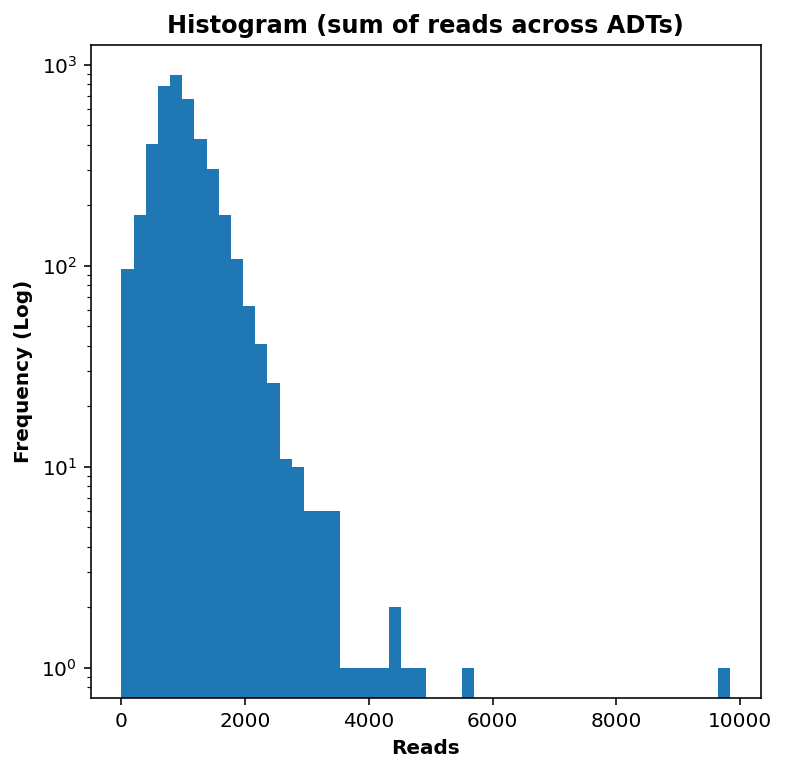

In [23]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

ax.hist(df_reads.sum(axis=1).sort_values(ascending=False), bins=50)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.set_title("Histogram (sum of reads across ADTs)", fontweight="bold")

plt.yscale("log")
plt.show()

### Histogram (sum of reads per ADTs)

/Users/chunj/opt/miniconda3/envs/sharp/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chunj/opt/miniconda3/envs/sharp/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/Users/chunj/opt/miniconda3/envs/sharp/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


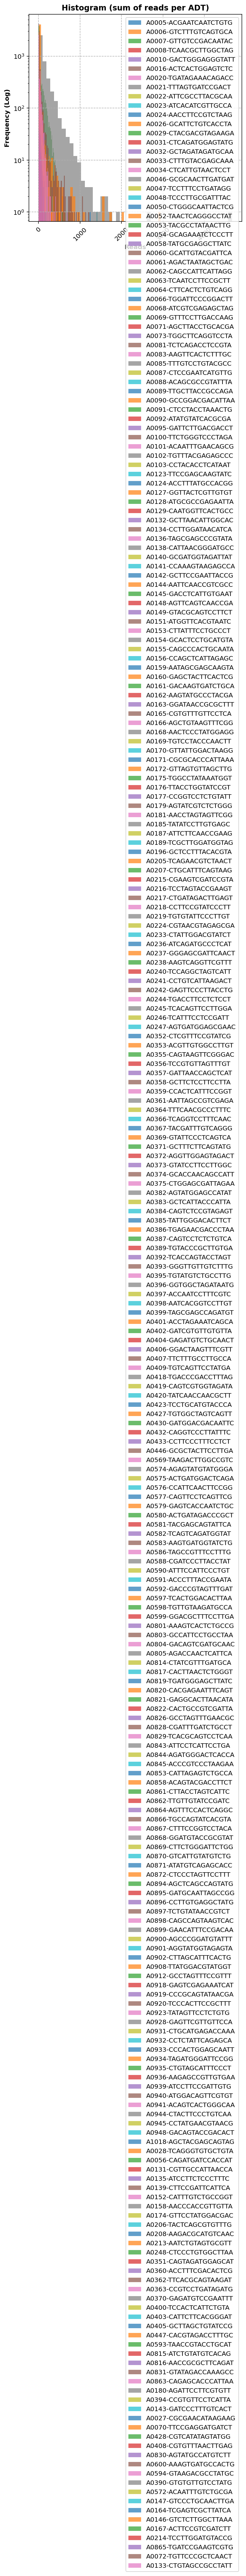

In [24]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
    
for idx, col in enumerate(df_reads.columns[:-1]):
    
    df_tmp = df_reads.iloc[:,idx].sort_values(ascending=False)

    ax.hist(df_tmp, bins=50, alpha=0.7, label=col)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.tick_params(axis="x", rotation=45)
ax.set_title("Histogram (sum of reads per ADT)", fontweight="bold")
ax.grid(b=True, linestyle="--")
ax.legend()

plt.yscale("log")
plt.tight_layout()
plt.show()

### Unmapped

In [25]:
df_reads.sort_values(by="unmapped", ascending=False).iloc[:,-1]

0
TCACGCTAGGCGAACT    611
CTCATGCTCTGCTAGA    429
AGAGAGCCACTTGGGC    403
TAAGTCGAGAATTTGG    395
TGGTACAGTTCCAGGC    378
                   ... 
TCGCTTGGTCCGTTTC      0
ACGTTCCTCACCTCTG      0
ATGGATCAGGAAGTGA      0
GGAGGTAGTGTCGCTG      0
CCGATGGAGTTGCCTA      0
Name: unmapped, Length: 4223, dtype: int64

In [26]:
df_reads.unmapped.sum()

166116

## UMI Count

In [27]:
mtx = scipy.io.mmread(
    os.path.join(path_data, "umis/matrix.mtx.gz")
)

In [28]:
barcodes = pd.read_csv(
    os.path.join(path_data, "umis/barcodes.tsv.gz"),
    sep="\t", 
    compression="gzip",
    header=None
)

In [29]:
features = pd.read_csv(
    os.path.join(path_data, "umis/features.tsv.gz"),
    sep="\t",
    compression="gzip",
    header=None
)

In [30]:
df_umis = pd.DataFrame(
    mtx.T.todense(),
    index=barcodes[0],
    columns=features[0]
)

In [31]:
df_umis

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT,unmapped
0,,,,,,,,,,,,,,,,,,,,,
TAGACCATCAAACGAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,1
ACAGCCGTCCATCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,3,0,6
GTGGGAAAGAGAGTTT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,1,1,5
ACTGTGACAGGCCCTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4
GTCGTTCTCGGCTTGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGGGTACAATTCTTC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
GGTTGTACAGAATTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,7
ATCAGGTGTCCAGTTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4


### Histogram (sum of UMIs across ADTs)

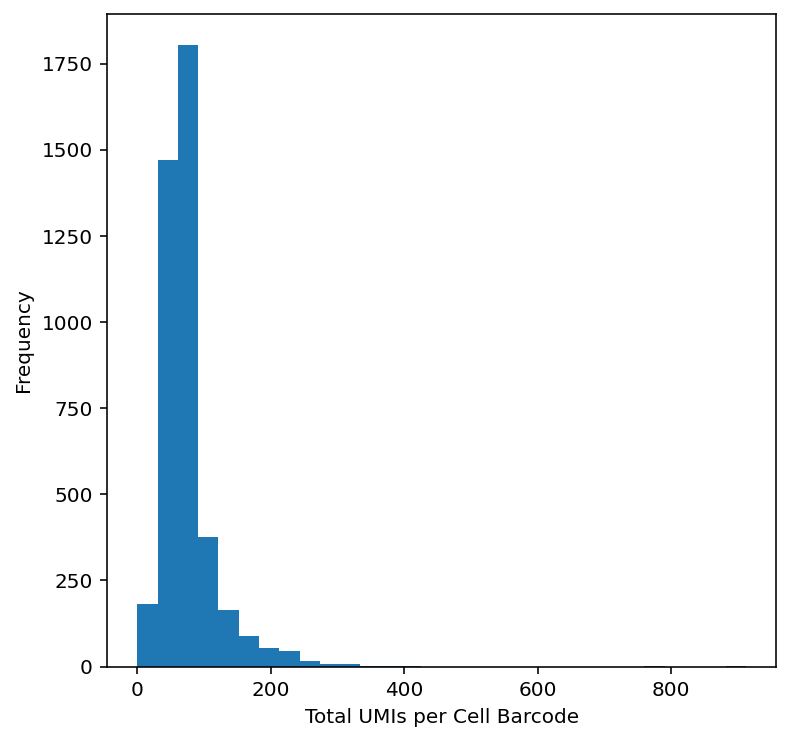

In [32]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

ax.hist(df_umis.values.sum(axis=1), bins=30)
ax.set_xlabel("Total UMIs per Cell Barcode")
ax.set_ylabel("Frequency")

plt.tight_layout
plt.show()

## Reads per UMI

### Calculate

In [33]:
# reads divided by UMI, replace NaN with zero
df_reads_per_umi = (df_reads / df_umis).replace(to_replace=np.NaN, value=0)
# remove the "unmapped" column
df_reads_per_umi = df_reads_per_umi.iloc[:,0:-1]
df_reads_per_umi

,A0005-ACGAATCAATCTGTG,A0006-GTCTTTGTCAGTGCA,A0007-GTTGTCCGACAATAC,A0008-TCAACGCTTGGCTAG,A0010-GACTGGGAGGGTATT,A0016-ACTCACTGGAGTCTC,A0020-TGATAGAAACAGACC,A0021-TTTAGTGATCCGACT,A0022-ATTCGCCTTACGCAA,A0023-ATCACATCGTTGCCA,...,A0390-GTGTGTTGTCCTATG,A0572-ACAATTTGTCTGCGA,A0147-GTCCCTGCAACTTGA,A0164-TCGAGTCGCTTATCA,A0146-GTCTCTTGGCTTAAA,A0167-ACTTCCGTCGATCTT,A0214-TCCTTGGATGTACCG,A0865-TGATCCGAAGTCGTG,A0072-TGTTCCCGCTCAACT,A0133-CTGTAGCCGCCTATT
0,,,,,,,,,,,,,,,,,,,,,
TAGACCATCAAACGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,9.000000
ACAGCCGTCCATCGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,1.666667,0.000000,0.0,29.0,13.333333,0.000000
GTGGGAAAGAGAGTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,10.5,1.000000,21.000000
ACTGTGACAGGCCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.000000,39.000000
GTCGTTCTCGGCTTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,0.000000,0.0,0.0,0.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCGGGTACAATTCTTC,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
GGTTGTACAGAATTCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76.500000,0.000000,0.0,0.0,1.000000,0.000000
ATCAGGTGTCCAGTTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,15.000000


In [34]:
sum_umis = df_umis.sum(axis=1).sum()
sum_reads = df_reads.sum(axis=1).sum()

In [35]:
reads_per_umi = sum_reads / sum_umis
reads_per_umi

13.415026923657592

### Histogram

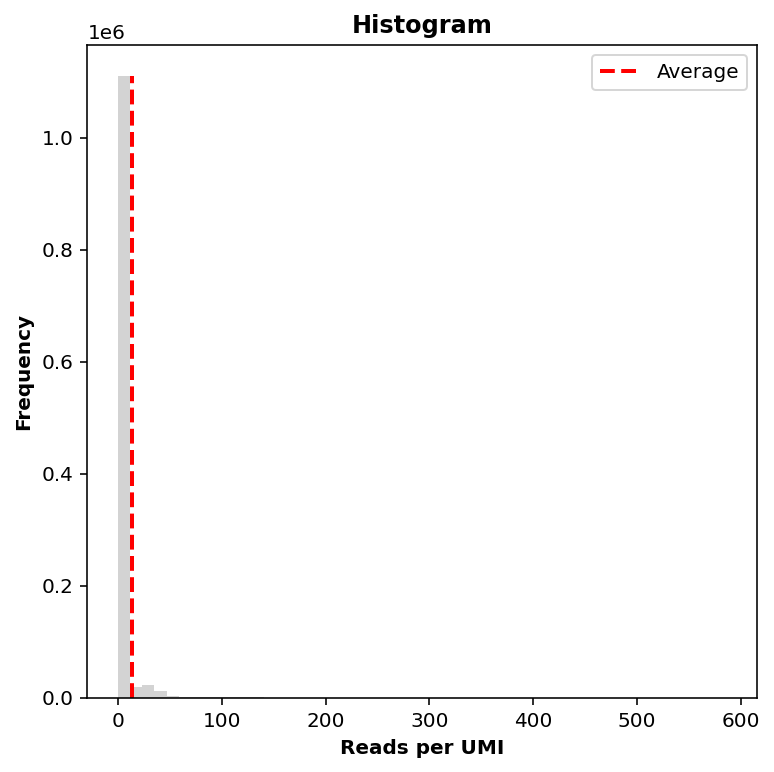

In [36]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(np.ravel(df_reads_per_umi.values), bins=50, color="lightgray")
ax.vlines(x=reads_per_umi, ymin=0, ymax=np.max(n), color="red", linestyle="--", lw=2, label="Average")

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency", fontweight="bold")
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.show()